Quation 2. (50 points) Download the dataset on spam vs. non-spam emails from the following URL: http://archive.ics.uci.edu/ml/datasets/Spambase. 
Specifically, (i) file “spambase.data” contains the actual data, and (ii) files “spambase.names” and “spambase.DOCUMENTATION” contain the description of the data.

This dataset has 4601 records, each record representing a different email message. Each record is described with 58 attributes (indicated in the aforementioned .names file): attributes 1-57 represent various content- based characteristics already extracted from each email message (related to the frequency of certain words or certain punctuation symbols in a message as well as to the usage of capital letters in a message), and the last attribute represents the class label for each message (spam or non-spam).

Task: The general task for this assignment is to build two different models for detecting spam messages (based on the email characteristics that are given):   
(i) the best possible model that you can build in terms of the overall predictive accuracy (i.e., not taking any cost information into account), and (ii) the best cost-sensitive classification model that you can build in terms of the average misclassification cost.  
Some specific instructions for your assignment/write-up:  
• Start working on the assignment early.
• Make sure to explore multiple classification techniques (we have learned quite a few of them in the
class by now).  

o Also, make sure to explore different configurations of each technique (for example, try several different values of k for k-NN) to find which configurations work best for this application.  
• Make sure to explore the impact of various data pre-processing techniques (e.g., normalization, attribute selection).  
• When building cost-sensitive prediction models, use 10:1 cost ratio for different misclassification errors. (It should be pretty clear which of the two errors – false positive or false negative – is the costlier one in this scenario.)  
• In general, use best practices when evaluating the models: nested CV, discuss the confusion matrix and some relevant performance metrics (accuracy, precision, recall, f-measure, AUC, average misclassification cost...), show some visual indications of model performance (ROC curves, lift charts).  
• As a deliverable, produce a write-up (in PDF) describing your aforementioned explorations. Report the performances of different models that you tried (i.e., using different data mining techniques, different attribute selection techniques, etc.) Discuss the best models in two different tasks in detail (which parameters worked best, what was the performance), provide some comparisons. (upload your code as well) Draw some conclusions from the assignment.

• Evaluation: 50 points:
o Performance: 30 points (based on the performance achieved by your best reported models).  
o Exploration/write-up: 20 points (based on the comprehensiveness of your exploration, i.e., when searching for the best performing model, did you evaluate and report just one or two techniques, or did you try a number of different variations, based on what you know from the class?).

## Objective

Task: The general task for this assignment is to build two different models for detecting spam messages (based on the email characteristics that are given):   
(i) the best possible model that you can build in terms of the overall predictive accuracy (i.e., not taking any cost information into account), and (ii) the best cost-sensitive classification model that you can build in terms of the average misclassification cost.  
Some specific instructions for your assignment/write-up:  
• Start working on the assignment early.
• Make sure to explore multiple classification techniques (we have learned quite a few of them in the
class by now).  

## Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

In [3]:
names = pd.read_csv('spam_names.csv', names=['name'])

In [4]:
spam = pd.read_csv('spambase.data',names= names.name.values.tolist())

In [5]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
spam.rename(columns={'char_freq_(':'char_freq_leftparen',
                           'char_freq_[':'char_freq_leftsquare',
                            'char_freq_!':'char_freq_leftsquare',
                            'char_freq_$':'char_freq_dollar',
                            'char_freq_#':'char_freq_hash',
                    'char_freq_;':'char_freq_semicolon'},inplace=True)

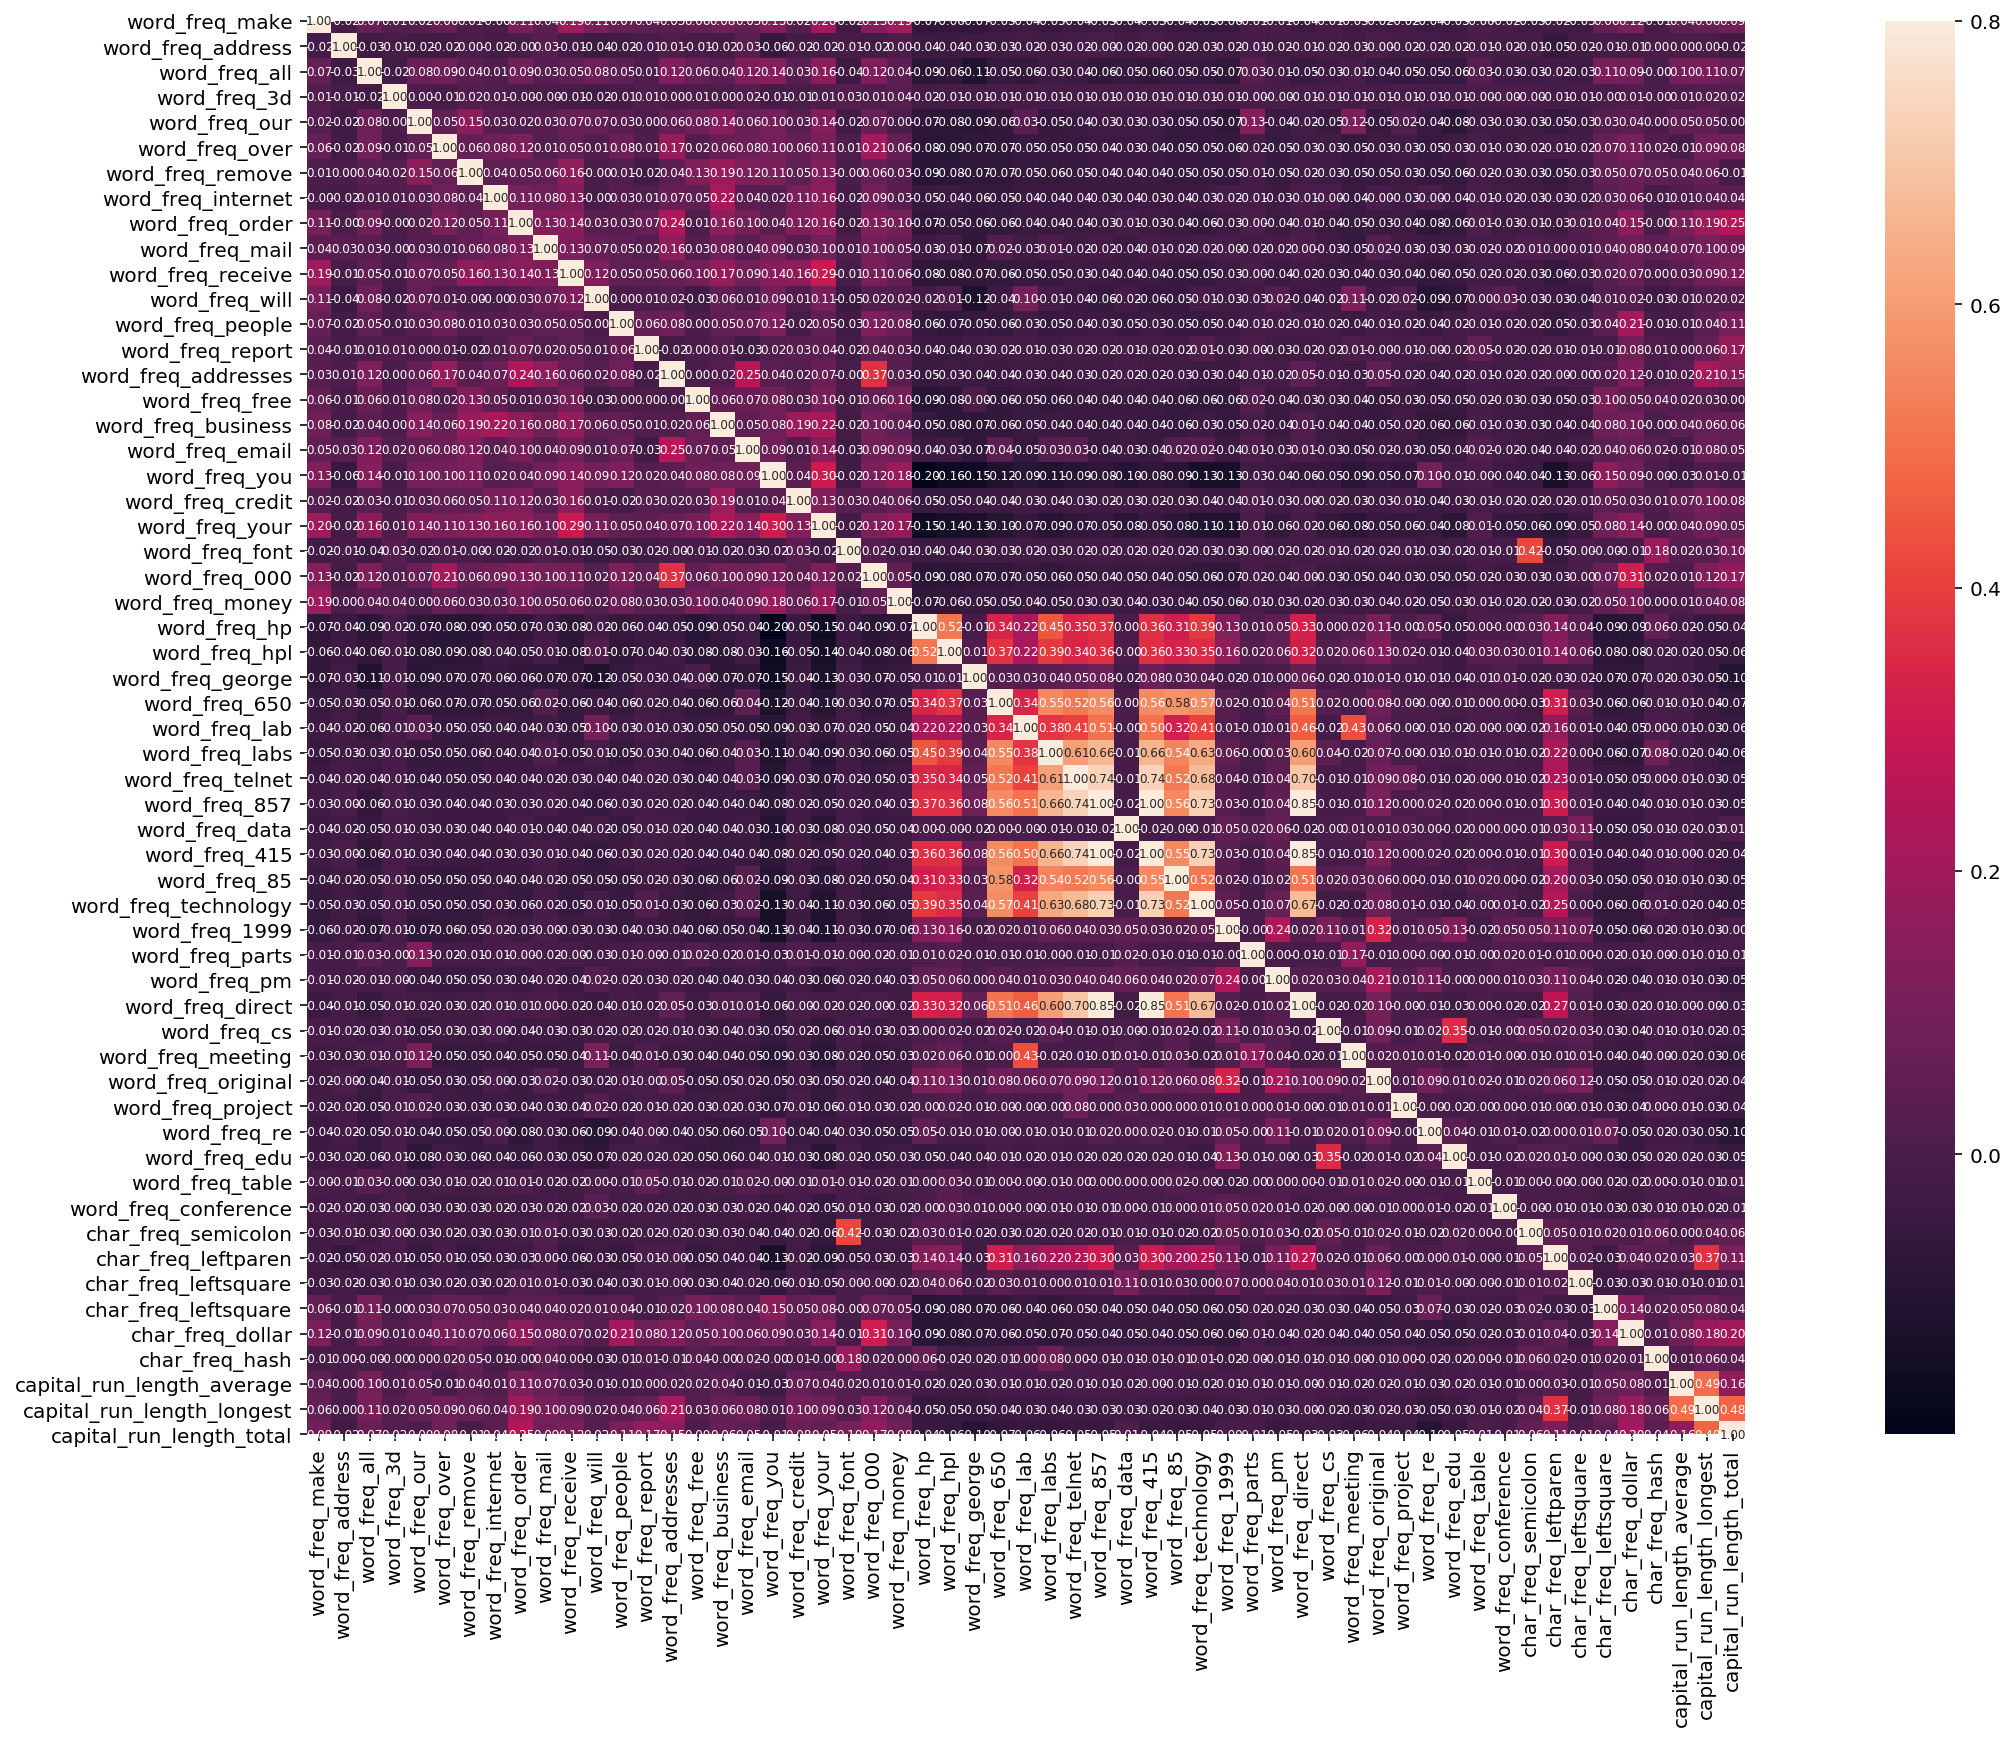

In [7]:
from sklearn import preprocessing

corrmat = spam.iloc[:,:-1].corr()
f, ax = plt.subplots(figsize=(25, 13))
sns.heatmap(corrmat, vmax=0.8, square=True,annot=True, \
                 fmt='.2f', annot_kws={'size': 6})

### Data Norm and Split

In [13]:
X = spam.iloc[:,:-1]
y = spam.iloc[:,-1]

In [14]:
# normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=13)

## Models for Overall Accuracy

**My goal is to predict if a new sms is spam or non-spam. I assume that is much worse misclassify non-spam than misclassify an spam. (I don't want to have false positives)**
<p>
The reason is because I normally don't check the spam messages.<p> The two possible situations are:<p>
1. New spam sms in my inbox. (False anegative).<p>
OUTCOME: I delete it.<p>
2. New non-spam sms in my spam folder (False positive).<p>  OUTCOME: I probably don't read it. <p>
I prefer the first option!!!

### Naive Bayes

In [17]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.metrics import recall_score,precision_score,confusion_matrix

alphas = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(alphas))
score_test = np.zeros(len(alphas))
recall_test = np.zeros(len(alphas))
precision_test= np.zeros(len(alphas))
count = 0
for alpha in alphas:
    clf_nb = MultinomialNB(alpha=alpha)
    clf_nb.fit(X_train, y_train)
    score_train[count] = clf_nb.score(X_train, y_train)
    score_test[count]= clf_nb.score(X_test, y_test)
    recall_test[count] = recall_score(y_test, clf_nb.predict(X_test))
    precision_test[count] = precision_score(y_test, clf_nb.predict(X_test))
    count = count + 1 

In [18]:
matrix = np.matrix(np.c_[alphas, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])

best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

alpha             18.590010
Train Accuracy     0.815761
Test Accuracy      0.808903
Test Recall        0.559459
Test Precision     0.940909
Name: 169, dtype: float64

Naive Bayes model can produce 80.1% test accuracy.

In [19]:
m_confusion = confusion_matrix(y_test, clf_nb.predict(X_test))
pd.DataFrame(data = m_confusion, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])

,Predicted Ham,Predicted Spam
Actual Ham,538,13
Actual Spam,169,201


**We misclassify 169 spam messages as non-spam emails whereas misclassify 13 non-spam messages as spam.**

### Support Vector Machine

We are going to apply the same reasoning applying the support vector machine model with the gaussian kernel.

We train different models changing the regularization parameter C. <p>
We evaluate the accuracy, recall and precision of the model with the test set.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = [{'kernel': ['rbf'], 
               'gamma': 10. ** np.arange(-5, 4),
               'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['linear'], 
               'C': [0.1,  1, 10, 100, 1000]}]

svm = SVC()

# Fit the grid search
clf_svc = GridSearchCV(estimator=svm, param_grid=parameters)
clf_svc.fit(X_train, y_train)

/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03]),
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
CV Score with best parameter values: 0.9369565217391305


In [28]:
clf_svc = clf_svc.best_estimator_

In [29]:
m_confusion_test = confusion_matrix(y_test, clf_svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])

,Predicted Ham,Predicted Spam
Actual Ham,528,23
Actual Spam,34,336


**SVM Classifier achives 93.7% accuracy. We misclassify 34 spam messages as non-spam emails whereas misclassify 23 non-spam messages as spam.**

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score


# Base Model
clf_rf = RandomForestClassifier(n_estimators=50, max_depth=None, n_jobs=-1)
clf_rf.fit(X_train, y_train)

#rf_pred=clf_rf.predict(X_test)

print('Base Model of Random Forest Accuracy: {}'.format(np.mean(cross_val_score(clf_rf, X, y, cv=3))))

Base Model of Random Forest Accuracy: 0.9304443042071885


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Improving Classification
rfg = RandomForestClassifier()
param = {'n_estimators': [50,150, 300,500],
        'max_depth': [5,8,10,20,30]}

rf_gscv = GridSearchCV(rfg, param, cv=3, n_jobs=-1)
rf_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [33]:
clf_rf = rf_gscv.best_estimator_
print('Test accuracy for random forest classifier: {}'.format(rf_gscv.best_score_))

{'max_depth': 30, 'n_estimators': 500}
Test accuracy for random forest classifier: 0.9489130434782609


In [34]:
m_confusion = confusion_matrix(y_test,rf_gscv.predict(X_test))
cm_forest = pd.DataFrame(data = m_confusion, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])
cm_forest

,Predicted Ham,Predicted Spam
Actual Ham,537,14
Actual Spam,27,343


**Random Forest Classifier achives 94.89% accuracy, with misclassifing 27 spam messages as non-spam emails whereas misclassify only 14 non-spam messages as spam.**

### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

param = {'learning_rate':[0.5,0.15,0.1,0.05,0.01], 
         'n_estimators':[100,250,500,750,1000,1500]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, 
                                                            min_samples_leaf=1, 
                                                            subsample=1,
                                                            max_features='sqrt',
                                                            random_state=10), 
            param_grid = param, scoring='accuracy',n_jobs=4, cv=5)

tuning.fit(X_train,y_train)

clf_gradientboost = tuning.best_estimator_
clf_gradientboost.fit(X_train, y_train)

#predictions = clf_gradientboost.predictions(X_test)

print("Accuracy from Gradient Boosting with best parameter values:", tuning.best_score_)

Accuracy from Gradient Boosting with best parameter values: 0.9586970658123434


In [67]:
cm_gradientboost = confusion_matrix(y_test,clf_gradientboost.predict(X_test))
cm_gradientboost = pd.DataFrame(data = cm_gradientboost, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])
cm_gradientboost

,Predicted Ham,Predicted Spam
Actual Ham,526,25
Actual Spam,20,350


**Random Forest Classifier achives 95.87% accuracy, with misclassifing 20 spam messages as non-spam emails whereas misclassify only 25 non-spam messages as spam.**

### Neural Network

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing import sequence
from keras import metrics

def get_simple_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['acc',metrics.binary_accuracy])
    print('compile done')
    return model

Using TensorFlow backend.


In [43]:
clf_mlp1 = get_simple_model()
history1 =clf_mlp1.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               29696     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 161,281
Trainable params: 161,281
Non-trainable params: 0
_________________________________________________________________
compile done


In [46]:
# evaluate the model
train_acc = clf_mlp1.evaluate(X_train, y_train, verbose=0)[1]
test_acc = clf_mlp1.evaluate(X_test, y_test, verbose=0)[1]
test_acc

0.9391965270042419

In [48]:
y_pred1 = clf_mlp1.predict(X_test).round()
cm_NN = confusion_matrix(y_test,y_pred1)
cm_NN = pd.DataFrame(data = cm_NN, columns = ['Predicted Ham', 'Predicted Spam'],
            index = ['Actual Ham', 'Actual Spam'])
cm_NN

,Predicted Ham,Predicted Spam
Actual Ham,522,29
Actual Spam,27,343


**Simple Neural Network Classifier achives 93.92% accuracy, with misclassifing 27 spam messages as non-spam emails whereas misclassify only 29 non-spam messages as spam.**

## Model Comparasion

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn import model_selection

models = []
models.append(('LR1', LogisticRegression()))
models.append(('LR2', LogisticRegression(C=100, penalty='l2', solver='liblinear')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20)))
models.append(('NB', clf_nb))
models.append(('RFC', rf_gscv.best_estimator_))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBC', clf_gradientboost))
models.append(('SVC', clf_svc))

# evaluate each model in turn
acc_results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 13)
    cv_results = cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    acc_results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

LR1: 0.844204 (0.105872)
LR2: 0.888301 (0.056075)
KNN: 0.829649 (0.114941)
NB: 0.665391 (0.326177)
RFC: 0.918505 (0.069005)
ADA: 0.908502 (0.072879)
GBC: 0.929369 (0.057500)
SVC: 0.917853 (0.049116)


**Lets get an average and standard deviation of each classifier to see which performed the strognest**

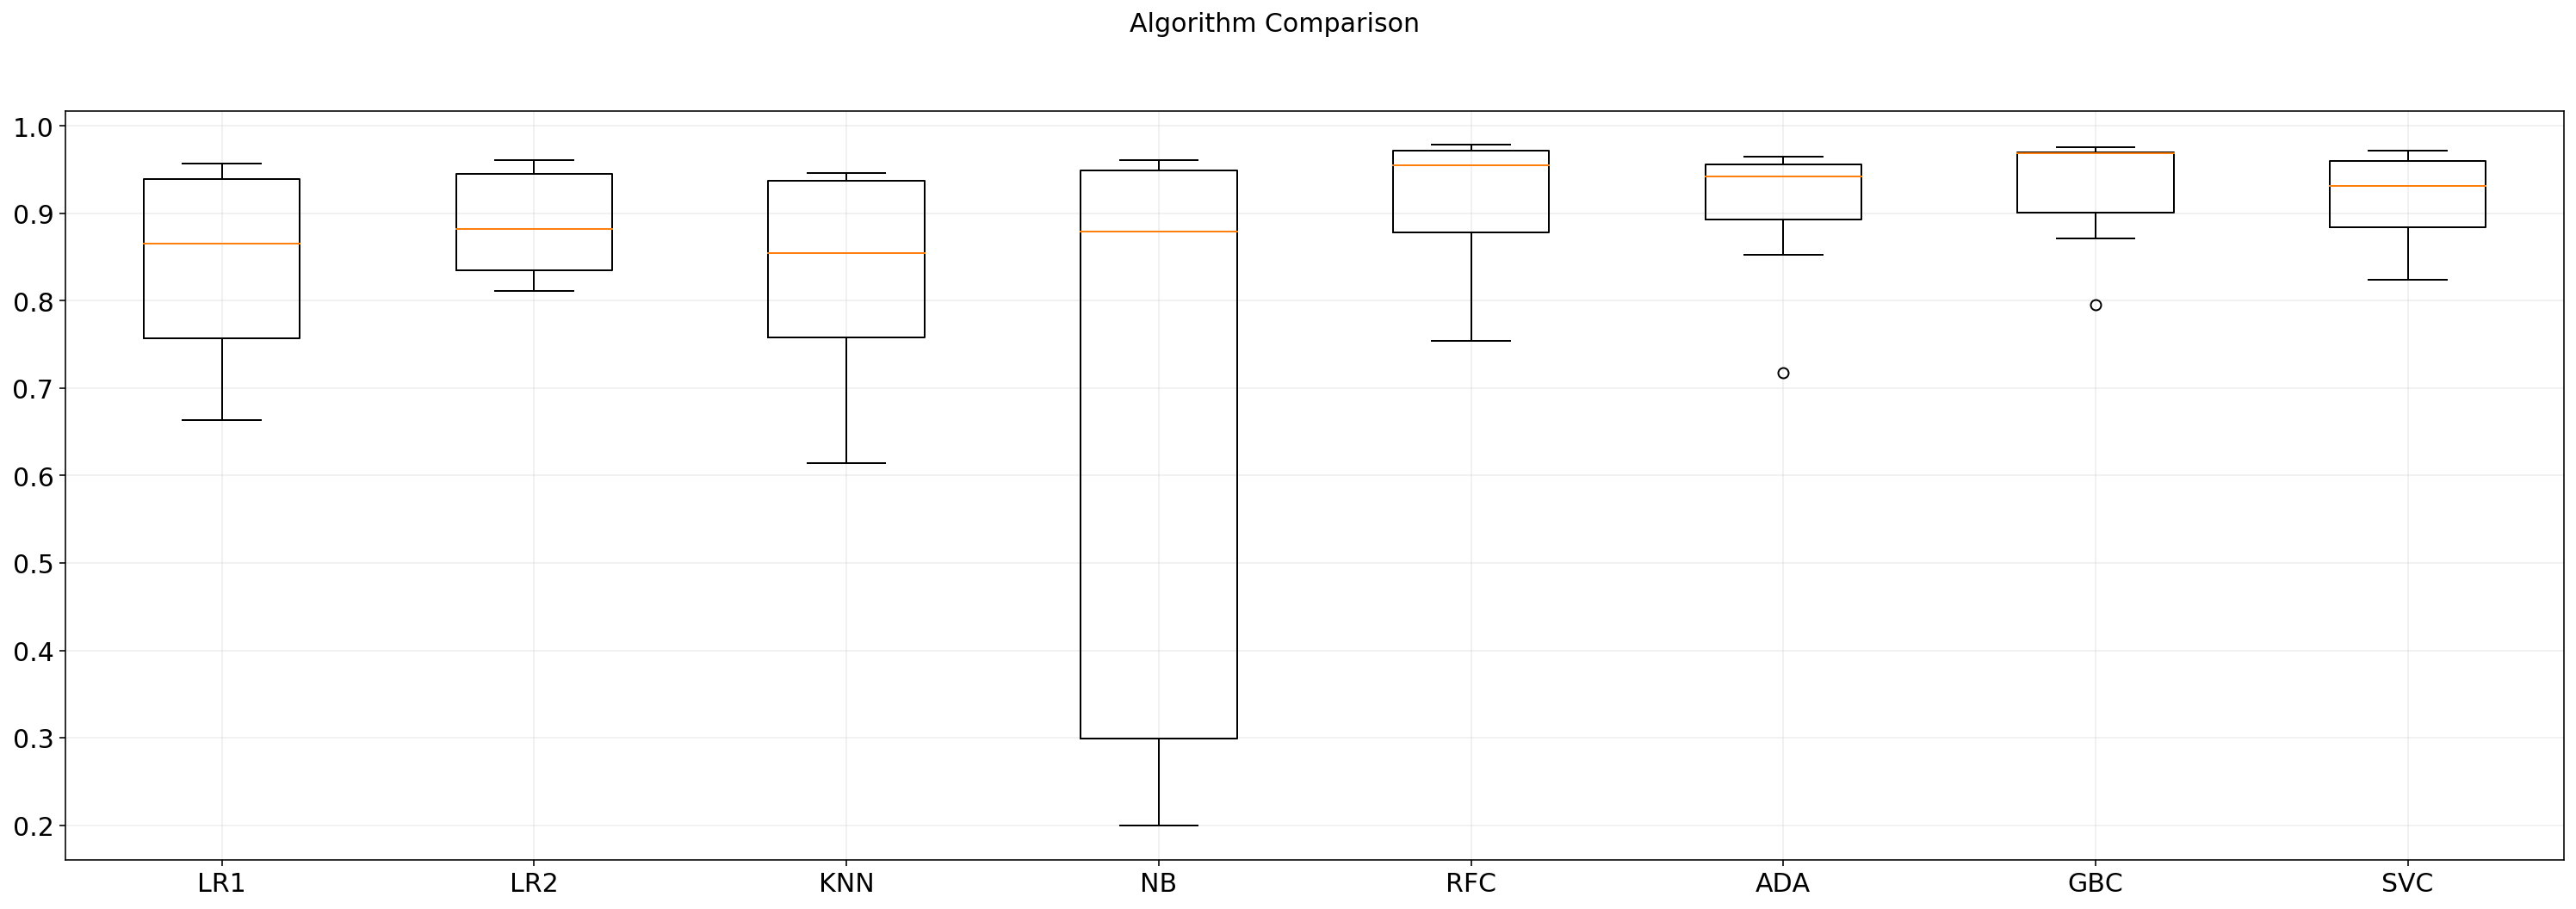

In [52]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(26,8))
fig.suptitle('Algorithm Comparison', fontsize=15)
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.grid(linewidth=1, alpha=0.3, color='lightgrey')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Plotting Accuracy of Models

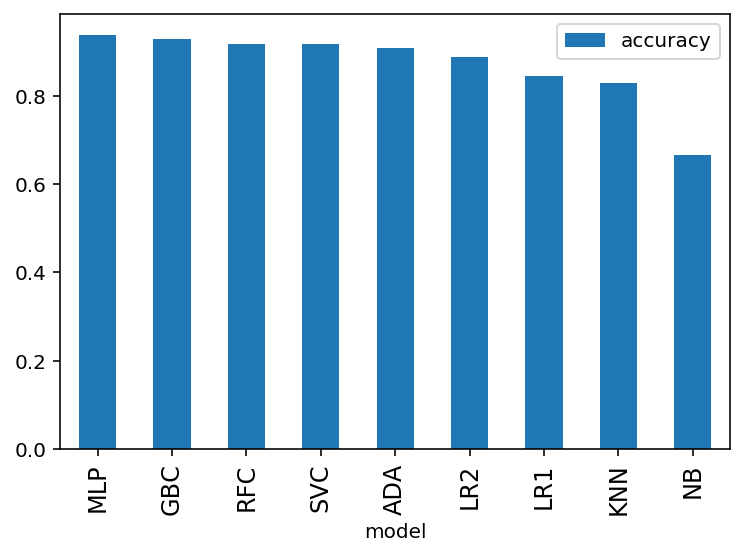

In [53]:
acc = pd.DataFrame(acc_results).mean(axis=1)
model_acc_df = pd.DataFrame({'model':names,'accuracy':acc})
model_acc_df.set_index('model',inplace=True)

model_acc_df.loc['MLP'] = test_acc


model_acc_df.sort_values(by='accuracy', ascending=False).plot(kind='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In [54]:
test_acc

0.9391965270042419

**Gradient boosting model outperformances others, Neural Network and Random Forest come close second, all of which have accuracy over 92%.**

**Simple Neural Network(multiple layer perceptron) model outperformances others, Gradient boosting comes close second, both of which have accuracy over 92%.**

## Cost Sensitive Models

1. (Fraud, Fraud): both the detected and true labels are "fraud", where financial institutes need a fixed number of cost to deal with this situation, let's say $C_a$.
2. (Legitimate, Fraud): FIs detect as normal but actually is a fraud, where the financial institute would lose the total numnber spent on this transaction. 
3. (Fraud, Legitimate): FIs detect as a Fraud but actually a normal one, where card holders would call the FIs to repay the order with 50% probability and give up the transaction with 50% probability. Actually there are intangible losses for FIs in this situation which is the satisfaction decline of the cusotmers, but at this point I just neglect it. 
4. (Legitimate, Legitimate): no cost.

|        | $Cost Matrix$| |
| ------ | ------ | ------ |
|        |  True Label $(t_i)$ |     |
| Predicted Label $(p_i)$| Spam (1)| Ham (0)|
| Spam (1) | 0 | $$10 * Amt_i$$ |
| Ham (0)| $Amt_i$ | 0 |


In [55]:
from sklearn.metrics import make_scorer

def my_misclassify_cost(y_true, y_pred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = -10*fn - fp
    return cost

### Pipeline Search for a New Cost Sensitive Model

In [58]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 500,1000],
                 "classifier__max_depth":[5,8,15],
             #    "classifier__min_samples_leaf":[1,2,5,10,15],
            #     "classifier__max_leaf_nodes": [2, 5,10]
                },
                {"classifier": [AdaBoostClassifier()],
                 "classifier__n_estimators": [10, 50, 100,500]
                },
                 {"classifier": [GradientBoostingClassifier()],
                 "classifier__n_estimators": [10, 50,100,500, 1000],
                 "classifier__max_depth":[3,5,8],
              #   "classifier__min_samples_split":np.linspace(0.1, 0.5, 12),
               #  "classifier__min_samples_leaf": np.linspace(0.1, 0.5, 12),
              #   "classifier__max_features":["log2","sqrt"],
                 "classifier__criterion": ["friedman_mse"],
                 "classifier__subsample":[0.5, 0.618, 0.85,1.0],
                 "classifier__learning_rate": [0.01, 0.05, 0.1, 0.15, 0.1,0.2],
                 "classifier__loss":["deviance"]},
                {"classifier": [SVC()],
                 "classifier__kernel": ['rbf'],
                 "classifier__gamma":10. ** np.arange(-5, 4),
                 "classifier__C":[0.1, 1, 10, 100, 1000]
                 }]

my_scorer = make_scorer(my_misclassify_cost, greater_is_better=True)

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, search_space, cv=3,n_jobs=-1,scoring = my_scorer) # Fit grid search
best_model = gridsearch.fit(X_train, y_train)

In [59]:
best_model.best_estimator_

Pipeline(memory=None,
         steps=[('classifier',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=500,
                                            n_iter_no_change=None,
                                            presort='auto', random_state=None,
                                            subsample=0.85, tol=0.0001,
                      

In [60]:
print('Lowest cost from grid search for the cost sensitive model: {}'.format(best_model.best_score_))

Lowest cost from grid search for the cost sensitive model: -313.33586956521737


__Put models together again.__

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import model_selection

models = []
models.append(('LR1', LogisticRegression()))
models.append(('LR2', LogisticRegression(C=100, penalty='l2', solver='liblinear')))
models.append(('KNN', KNeighborsClassifier(n_neighbors=20)))
models.append(('NB', clf_nb))
models.append(('RFC', rf_gscv.best_estimator_))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GBC', clf_gradientboost))
models.append(('SVC', clf_svc))

# evaluate each model in turn
results = []
names = []

my_scorer = make_scorer(my_misclassify_cost, greater_is_better=True)

for name, model in models:
    kfold = model_selection.KFold(n_splits = 15, random_state = 7)
    cv_results = cross_val_score(model, X, y, cv = kfold, scoring = my_scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xueni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

LR1: -305.133333 (362.114506)
LR2: -179.733333 (213.095117)
KNN: -329.000000 (384.989177)
NB: -766.533333 (930.131236)
RFC: -124.533333 (154.437416)
ADA: -128.400000 (154.954961)
GBC: -106.333333 (135.869382)
SVC: -132.066667 (158.297385)


### Plotting the cost comparasion

Costs across models
             cost
model            
GBC   -106.333333
RFC   -124.533333
ADA   -128.400000
SVC   -132.066667
LR2   -179.733333
NN    -299.000000
LR1   -305.133333
KNN   -329.000000
NB    -766.533333


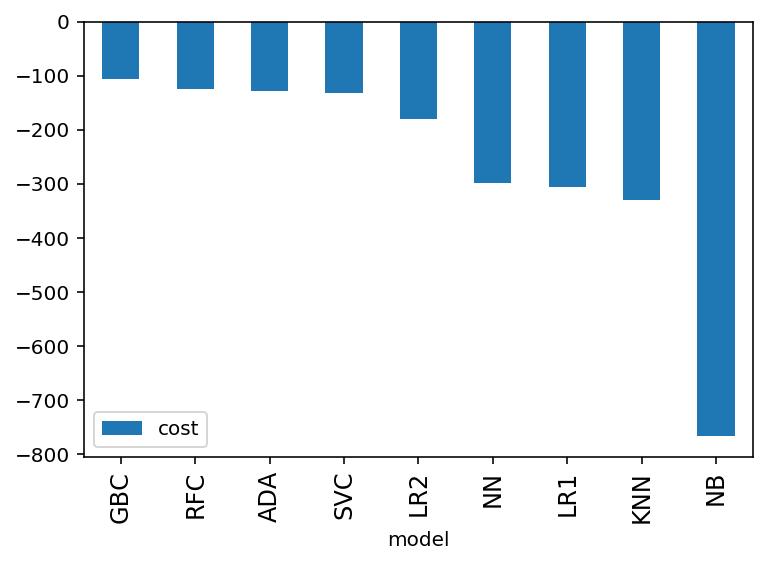

In [63]:
cost = pd.DataFrame(results).mean(axis=1)
model_cost_df = pd.DataFrame({'model':names,'cost':cost})
model_cost_df.set_index('model',inplace=True)
model_cost_df.loc['NN'] = my_misclassify_cost(y_test,y_pred1.round())
print('Costs across models')
print(model_cost_df.sort_values(by='cost', ascending=False))

model_cost_df.sort_values(by='cost', ascending=False).plot(kind='bar')
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

### Plotting feature importance

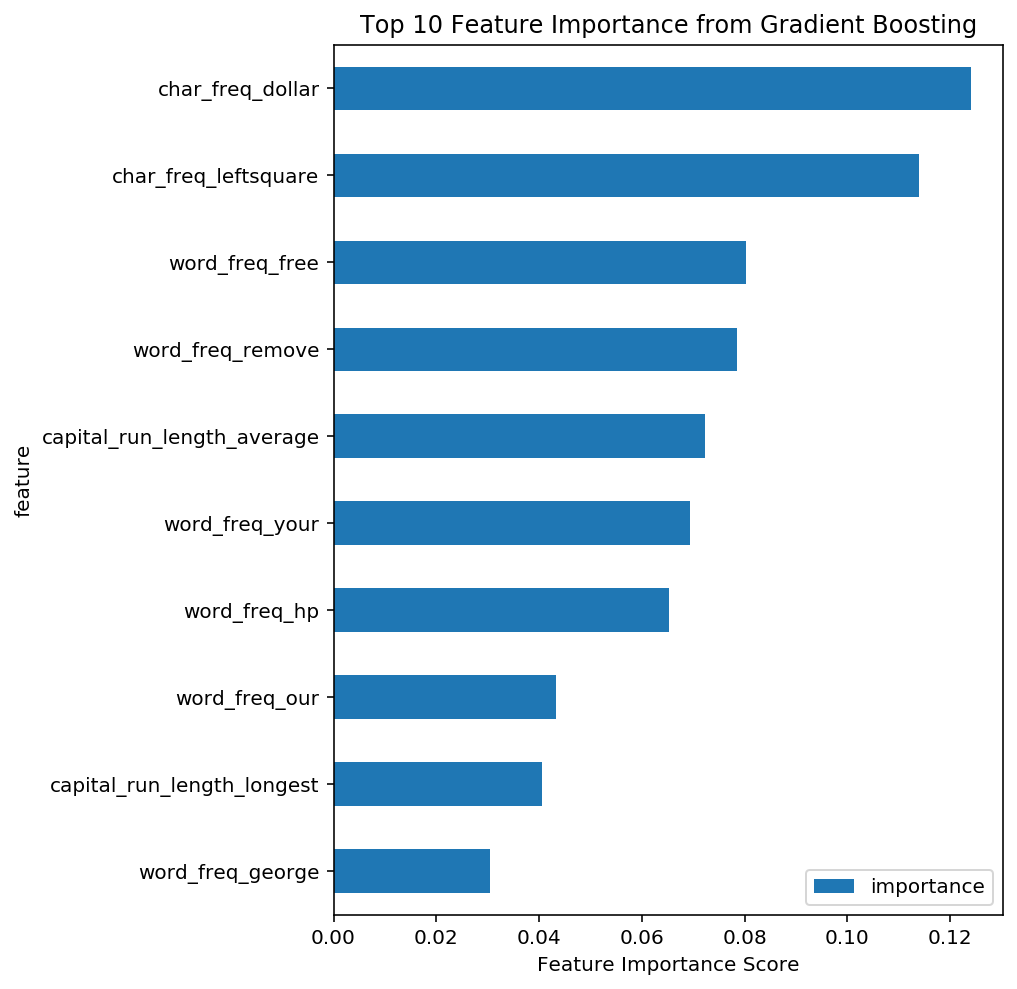

In [75]:
feat_imp = pd.DataFrame({'importance':clf_gradientboost.feature_importances_})    
feat_imp['feature'] = spam.iloc[:,:-1].columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(title = 'Top 10 Feature Importance from Gradient Boosting', figsize=(6,8))
plt.xlabel('Feature Importance Score')
plt.show()

## Conclusion

- As we can see, Neural Network (multiple layer perceptron) has the best best performance for overall accuracy (95.88%).
- Gradient Boosting Classifier has the best performance for cost sensitive evaluation cost of (106.33). 
- Although Neural Network has a decent performance for accuracy (95.88%), however, it has great cost (-299) in a cost sensitive framework. 
- Also, it is worth mentioning that Gradient Boosting  and Random Forest are able to achieve a good accuracy score and relatively low cost in both scenarios. 